In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Data/CC_2028.csv'

data = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
data.head()

,ID,ContainerType,StartTime,EndTime,HoistStartPosition,HoistEndPosition,TravelStartPosition,TravelEndPosition,TrolleyStartPosition,TrolleyEndPosition,...,CycleFinalTime,HoistPositionFinal,TravelPositionFinal,TrolleyPositionFinal,SlewPositionFinal,LoadBack,ContainerTypeBack,ExcentricLoadBack,SpreaderIDFront,SpreaderIDBack
0,97835,220,21/05/2019 15:30:43,21/05/2019 15:32:11,-10.819,2.834,3979.105957,3979.105957,84.251999,44.028000,...,33:02.0,-10.836,3979.105957,87.057999,NaN,0,0,0,0,-1
1,97836,220,21/05/2019 15:33:02,21/05/2019 15:35:39,-10.836,2.659,3979.105957,3979.105957,87.057999,32.368000,...,36:47.0,-10.792,3979.105957,91.810997,NaN,0,0,0,0,-1
2,97837,220,21/05/2019 15:36:47,21/05/2019 15:37:50,-10.792,2.807,3979.105957,3979.105957,91.810997,44.057999,...,39:02.0,-10.777,3979.105957,94.808998,NaN,0,0,0,0,-1
3,97838,220,21/05/2019 15:39:02,21/05/2019 15:39:58,-10.777,2.760,3979.105957,3979.105957,94.808998,37.266998,...,40:50.0,-10.750,3979.105957,96.515999,NaN,0,0,0,0,-1
4,97839,220,21/05/2019 15:40:50,21/05/2019 15:42:50,-10.750,2.845,3979.105957,3979.105957,96.515999,43.544998,...,44:24.0,3.606,3979.105957,6.132000,NaN,0,0,0,0,-1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150736 entries, 0 to 150735
Data columns (total 57 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ID                             150736 non-null  int64  
 1   ContainerType                  150736 non-null  int64  
 2   StartTime                      150736 non-null  object 
 3   EndTime                        150736 non-null  object 
 4   HoistStartPosition             150736 non-null  float64
 5   HoistEndPosition               150736 non-null  float64
 6   TravelStartPosition            150736 non-null  float64
 7   TravelEndPosition              150736 non-null  float64
 8   TrolleyStartPosition           150736 non-null  float64
 9   TrolleyEndPosition             150736 non-null  float64
 10  SlewStartPosition              0 non-null       float64
 11  SlewEndPosition                0 non-null       float64
 12  Load                          

In [ ]:
data['StartTime'] = pd.to_datetime(data['StartTime'])
data['EndTime'] = pd.to_datetime(data['EndTime'])

data['TimeDifferenceSeconds'] = (data['EndTime'] - data['StartTime']).dt.total_seconds()

data[['StartTime', 'EndTime', 'TimeDifferenceSeconds']].head()

<ipython-input-5-41aea3d04dea>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['StartTime'] = pd.to_datetime(data['StartTime'])
<ipython-input-5-41aea3d04dea>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['EndTime'] = pd.to_datetime(data['EndTime'])


,StartTime,EndTime,TimeDifferenceSeconds
0,2019-05-21 15:30:43,2019-05-21 15:32:11,88.0
1,2019-05-21 15:33:02,2019-05-21 15:35:39,157.0
2,2019-05-21 15:36:47,2019-05-21 15:37:50,63.0
3,2019-05-21 15:39:02,2019-05-21 15:39:58,56.0
4,2019-05-21 15:40:50,2019-05-21 15:42:50,120.0


In [ ]:
data.isnull().sum()

ID                                    0
ContainerType                         0
StartTime                             0
EndTime                               0
HoistStartPosition                    0
HoistEndPosition                      0
TravelStartPosition                   0
TravelEndPosition                     0
TrolleyStartPosition                  0
TrolleyEndPosition                    0
SlewStartPosition                150736
SlewEndPosition                  150736
Load                                  0
ExcentricLoad                         0
SpreaderType                          0
MaxHoistHeightNotEmpty           150736
MaxHoistSpeedNotEmptyUp          150736
MaxHoistSpeedNotEmptyDown        150736
MaxTravelSpeedNotEmpty           150736
MaxTrolleySpeedNotEmpty          150736
DurationAutomationNotEmpty       150736
DurationManualNotEmpty           150736
DurationWaitingForRosNotEmpty    150736
DurationWaitingForTosNotEmpty    150736
PickupAuto                            0


In [ ]:
columns_to_drop = data.columns[data.isnull().all()]
data_cleaned = data.drop(columns=columns_to_drop)

data_cleaned = data_cleaned[data_cleaned['ElectricConsumptionNotEmpty'] > 0]

data_cleaned.info(), data_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 150535 entries, 0 to 150735
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   ID                           150535 non-null  int64         
 1   ContainerType                150535 non-null  int64         
 2   StartTime                    150535 non-null  datetime64[ns]
 3   EndTime                      150535 non-null  datetime64[ns]
 4   HoistStartPosition           150535 non-null  float64       
 5   HoistEndPosition             150535 non-null  float64       
 6   TravelStartPosition          150535 non-null  float64       
 7   TravelEndPosition            150535 non-null  float64       
 8   TrolleyStartPosition         150535 non-null  float64       
 9   TrolleyEndPosition           150535 non-null  float64       
 10  Load                         150535 non-null  float64       
 11  ExcentricLoad                15

(None,
       ID  ContainerType           StartTime             EndTime  \
 0  97835            220 2019-05-21 15:30:43 2019-05-21 15:32:11   
 1  97836            220 2019-05-21 15:33:02 2019-05-21 15:35:39   
 2  97837            220 2019-05-21 15:36:47 2019-05-21 15:37:50   
 3  97838            220 2019-05-21 15:39:02 2019-05-21 15:39:58   
 4  97839            220 2019-05-21 15:40:50 2019-05-21 15:42:50   
 
    HoistStartPosition  HoistEndPosition  TravelStartPosition  \
 0             -10.819             2.834          3979.105957   
 1             -10.836             2.659          3979.105957   
 2             -10.792             2.807          3979.105957   
 3             -10.777             2.760          3979.105957   
 4             -10.750             2.845          3979.105957   
 
    TravelEndPosition  TrolleyStartPosition  TrolleyEndPosition  ...  \
 0        3979.105957             84.251999           44.028000  ...   
 1        3979.105957             87.057999    

In [ ]:
feature_columns = ['HoistStartPosition', 'HoistEndPosition', 'TravelStartPosition',
                   'TravelEndPosition', 'TrolleyStartPosition', 'TrolleyEndPosition',
                   'Load', 'ExcentricLoad', 'IsElectricMoveNotEmpty', 'TimeDifferenceSeconds']

target_column = 'ElectricConsumptionNotEmpty'

X = data[feature_columns]
y = data[target_column]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [ ]:
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/25
3769/3769 [==============================] - 12s 3ms/step - loss: 141566668701696.0000 - mae: 8925393.0000 - val_loss: 115990893428736.0000 - val_mae: 8121748.5000
Epoch 2/25
3769/3769 [==============================] - 11s 3ms/step - loss: 116561268441088.0000 - mae: 8118836.5000 - val_loss: 109322805706752.0000 - val_mae: 7902006.0000
Epoch 3/25
3769/3769 [==============================] - 10s 3ms/step - loss: 102577643454464.0000 - mae: 7564766.0000 - val_loss: 87567949103104.0000 - val_mae: 6922146.5000
Epoch 4/25
3769/3769 [==============================] - 10s 3ms/step - loss: 87409664458752.0000 - mae: 6668559.0000 - val_loss: 80251254210560.0000 - val_mae: 6436094.5000
Epoch 5/25
3769/3769 [==============================] - 11s 3ms/step - loss: 84199193182208.0000 - mae: 6433304.5000 - val_loss: 78361611206656.0000 - val_mae: 6309301.0000
Epoch 6/25
3769/3769 [==============================] - 10s 3ms/step - loss: 82700392202240.0000 - mae: 6368435.5000 - val_loss: 7

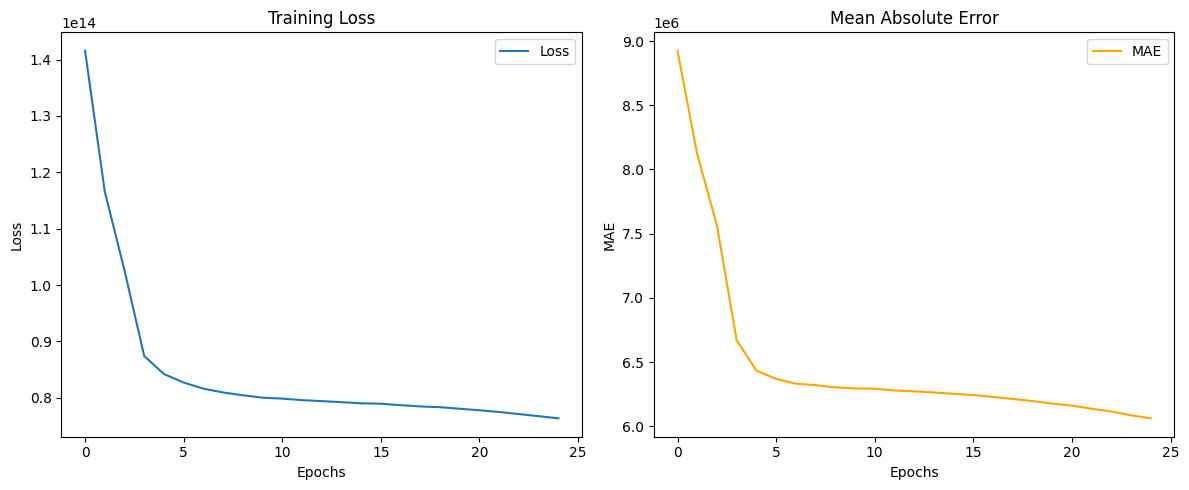

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE', color='orange')
plt.title('Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()

plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

943/943 [==============================] - 2s 2ms/step - loss: 72106058448896.0000 - mae: 5861641.0000
Test Loss: [72106058448896.0, 5861641.0]


#Next Sprint

In [ ]:
# Calculate IQR for ElectricConsumptionNotEmpty
Q1 = data_cleaned['ElectricConsumptionNotEmpty'].quantile(0.25)
Q3 = data_cleaned['ElectricConsumptionNotEmpty'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = data_cleaned[(data_cleaned['ElectricConsumptionNotEmpty'] < lower_bound) |
                        (data_cleaned['ElectricConsumptionNotEmpty'] > upper_bound)]

# Data without outliers
data_no_outliers = data_cleaned[(data_cleaned['ElectricConsumptionNotEmpty'] >= lower_bound) &
                                (data_cleaned['ElectricConsumptionNotEmpty'] <= upper_bound)]

In [ ]:
X = data_no_outliers[feature_columns]
y_log = np.log1p(data_no_outliers[target_column])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001)
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/25
3693/3693 [==============================] - 9s 2ms/step - loss: 10.4127 - mae: 2.2882 - val_loss: 6.2567 - val_mae: 1.7491
Epoch 2/25
3693/3693 [==============================] - 9s 2ms/step - loss: 6.1871 - mae: 1.8634 - val_loss: 6.1524 - val_mae: 1.9694
Epoch 3/25
3693/3693 [==============================] - 9s 2ms/step - loss: 6.0025 - mae: 1.8203 - val_loss: 5.7730 - val_mae: 1.7570
Epoch 4/25
3693/3693 [==============================] - 7s 2ms/step - loss: 5.8705 - mae: 1.7859 - val_loss: 5.6783 - val_mae: 1.7406
Epoch 5/25
3693/3693 [==============================] - 8s 2ms/step - loss: 5.7744 - mae: 1.7642 - val_loss: 5.8018 - val_mae: 1.6538
Epoch 6/25
3693/3693 [==============================] - 7s 2ms/step - loss: 5.7103 - mae: 1.7469 - val_loss: 5.7498 - val_mae: 1.7661
Epoch 7/25
3693/3693 [==============================] - 8s 2ms/step - loss: 5.6473 - mae: 1.7272 - val_loss: 5.4859 - val_mae: 1.6883
Epoch 8/25
3693/3693 [==============================] - 9s 2m

In [ ]:
test_loss = model2.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

924/924 [==============================] - 1s 1ms/step - loss: 5.0989 - mae: 1.4568
Test Loss: [5.098916530609131, 1.4567902088165283]


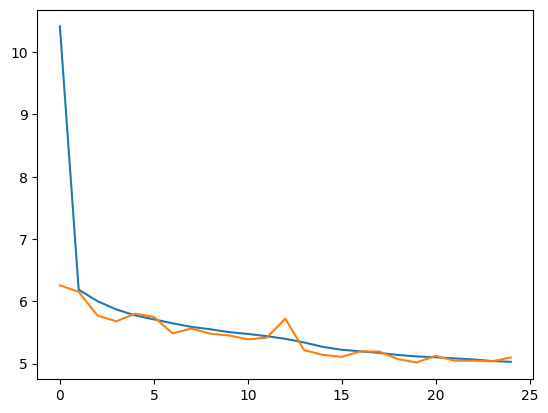

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

924/924 [==============================] - 1s 1ms/step


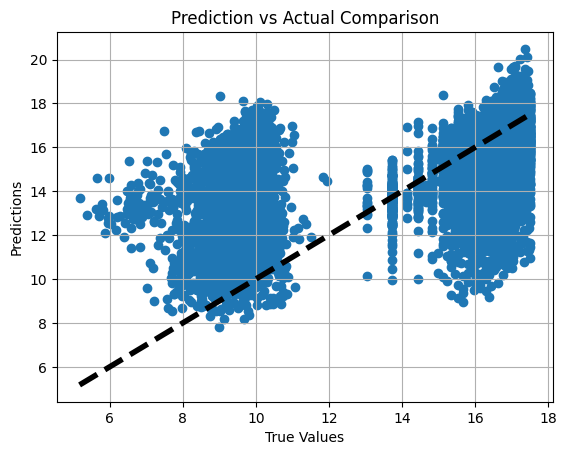

In [ ]:
y_pred = model2.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Prediction vs Actual Comparison')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.grid(True)
plt.show()

In [ ]:
data_no_outliers.to_csv('data')